In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('diabetic_data.csv') 

In [404]:
data.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [405]:
data = data.drop('encounter_id', axis=1)


In [406]:
data.shape

(101766, 49)

In [407]:
data.head(5)

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [408]:
data.isnull().sum()

patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitaz

In [409]:
data = data.replace('?', np.nan)

In [410]:
data.head(10)

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,NaN,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,NaN,...,No,No,No,No,No,No,No,No,Yes,>30
8,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [411]:
data.isnull().sum()

patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

In [412]:

# Convert 'readmitted' to binary classification
def convert_readmission(value):
  if value == '<30':
    return 1
  else:
    return 0

data['readmitted'] = data['readmitted'].apply(convert_readmission)




In [413]:
display(data.iloc[12])

patient_nbr                               85504905
race                                     Caucasian
gender                                      Female
age                                        [40-50)
weight                                         NaN
admission_type_id                                1
discharge_disposition_id                         3
admission_source_id                              7
time_in_hospital                                 7
payer_code                                     NaN
medical_specialty           Family/GeneralPractice
num_lab_procedures                              60
num_procedures                                   0
num_medications                                 15
number_outpatient                                0
number_emergency                                 1
number_inpatient                                 0
diag_1                                         428
diag_2                                      250.43
diag_3                         

In [414]:
count_ones = data['readmitted'].sum()

In [415]:
print(count_ones)

11357


In [416]:
data.shape

(101766, 49)

In [417]:
data['readmitted'] = data['readmitted'].astype(bool)


In [418]:
print(data.dtypes)

patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide       

In [419]:
missing_percentages = data.isnull().sum() / len(data) * 100
columns_to_drop = missing_percentages[missing_percentages > 90].index
data = data.drop(columns_to_drop, axis=1)


In [420]:
data.shape

(101766, 48)

In [421]:

# Columns with no variations
no_variation_cols = ['examide', 'citoglipton']


# Drop all columns 
data = data.drop(no_variation_cols, axis=1) 


In [422]:
near_zero_variance_cols = ['repaglinide', 'nateglinide', 'chlorpropamide', 
                           'glimepiride', 'acetohexamide', 'tolbutamide', 
                           'acarbose', 'miglitol', 'troglitazone',
                           'glipizide-metformin', 'glimepiride-pioglitazone', 
                           'metformin-rosiglitazone', 'metformin-pioglitazone']

data = data.drop(near_zero_variance_cols, axis=1) 

In [423]:
data.shape

(101766, 33)

In [424]:
data.dropna(inplace=True)


In [425]:
numerical_columns = data.select_dtypes(include=np.number)


In [426]:
print(numerical_columns.describe())

        patient_nbr  admission_type_id  discharge_disposition_id  \
count  2.675500e+04       26755.000000              26755.000000   
mean   5.732865e+07           2.019137                  2.959821   
std    3.710987e+07           0.946664                  4.327149   
min    7.290000e+02           1.000000                  1.000000   
25%    2.425177e+07           1.000000                  1.000000   
50%    4.401274e+07           2.000000                  1.000000   
75%    9.230198e+07           3.000000                  3.000000   
max    1.893659e+08           6.000000                 28.000000   

       admission_source_id  time_in_hospital  num_lab_procedures  \
count         26755.000000      26755.000000        26755.000000   
mean              4.972267          4.317922           40.756681   
std               3.522615          2.949791           19.965546   
min               1.000000          1.000000            1.000000   
25%               1.000000          2.000000   

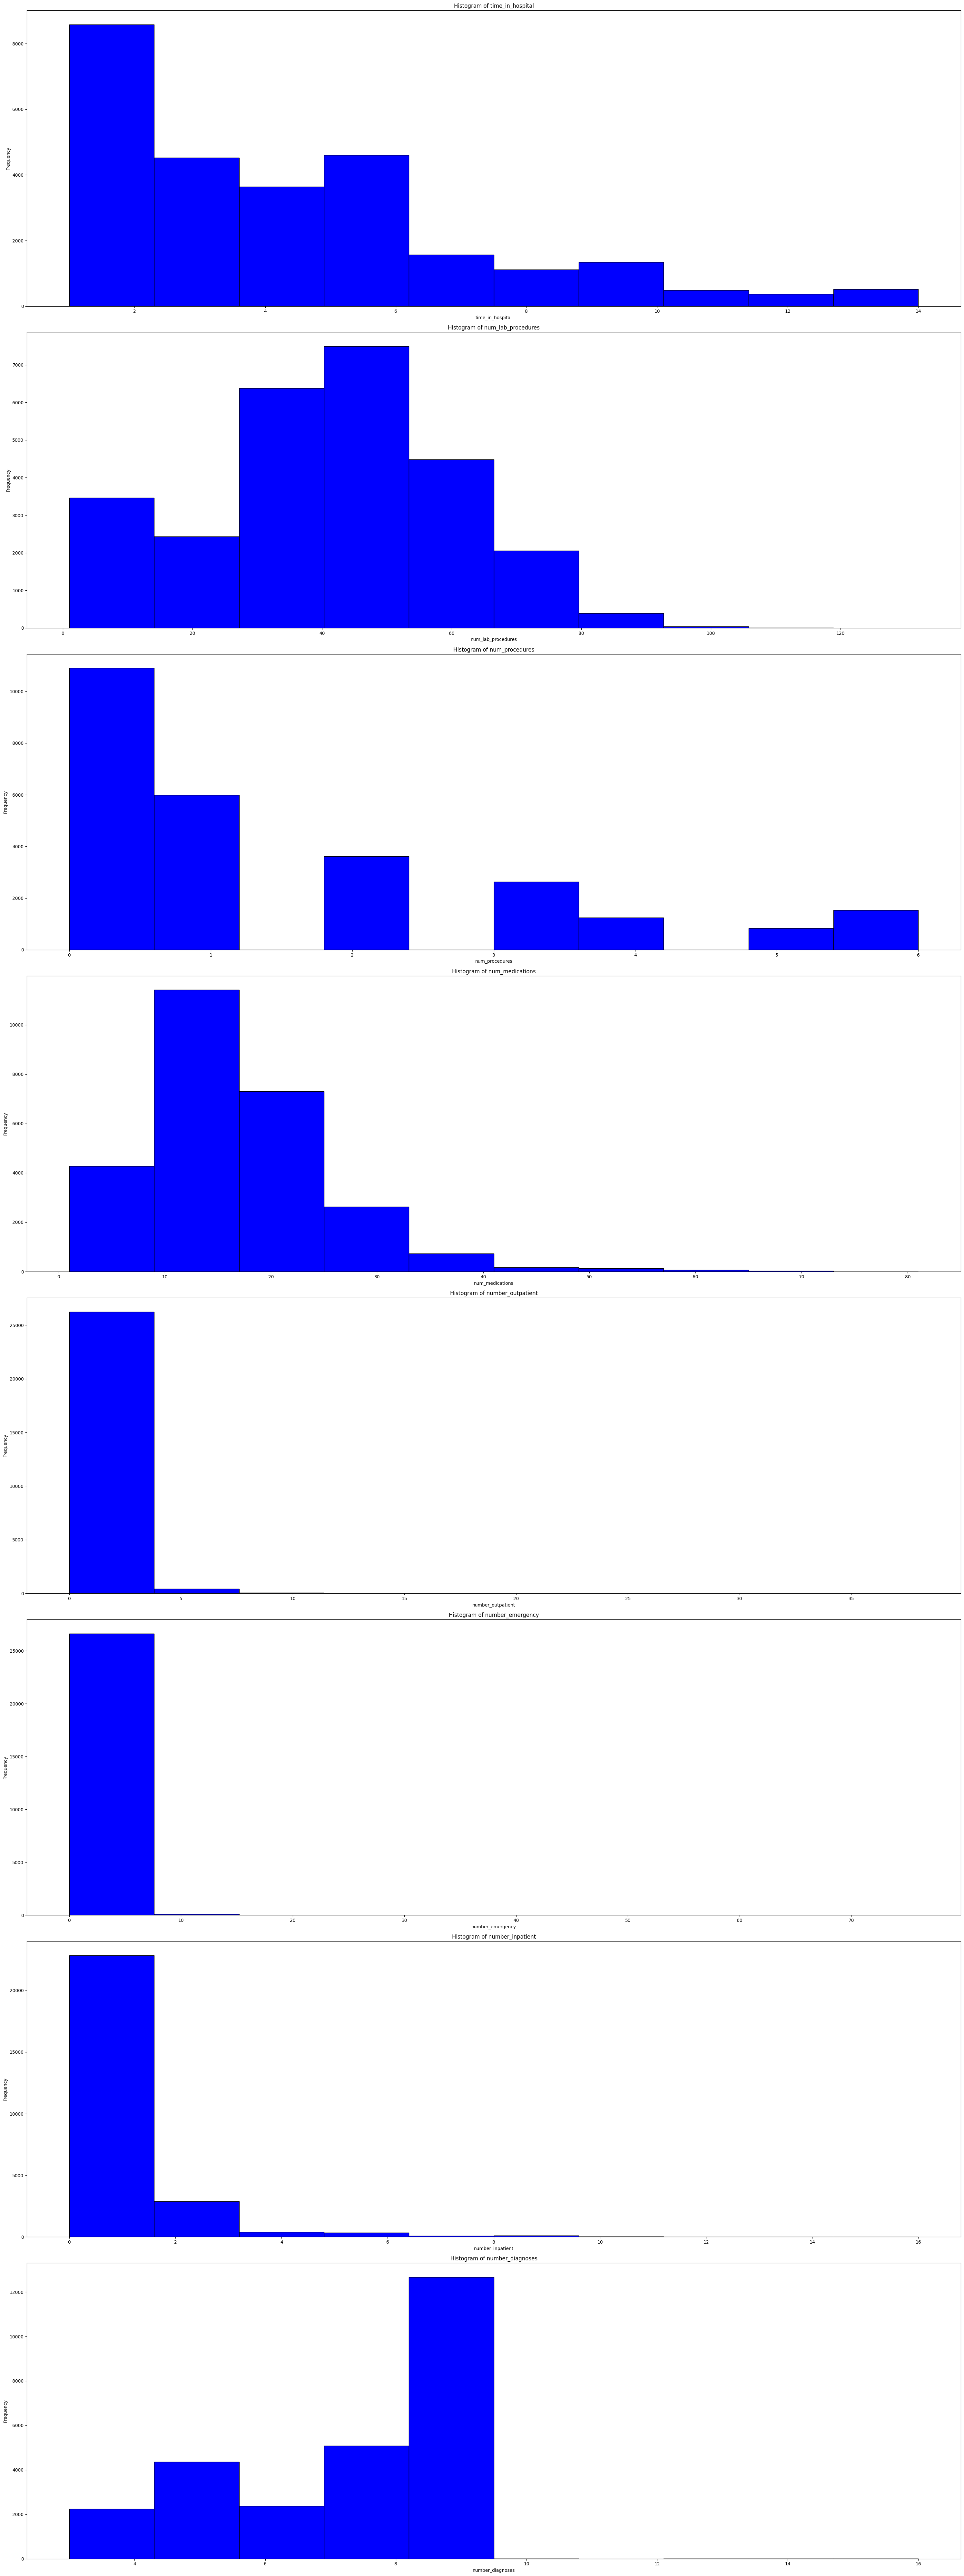

In [427]:
features = ['time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses']

# Create a figure and subplots (2 rows, 1 column in this case)
fig, axes = plt.subplots(8, 1, figsize=(30, 80))  # Adjust figsize as needed

# Plot histograms for each feature on separate subplots
for i, feature in enumerate(features):
  axes[i].hist(data[feature], bins=10, color='blue', edgecolor='black')
  axes[i].set_xlabel(feature)
  axes[i].set_ylabel('Frequency')
  axes[i].set_title(f'Histogram of {feature}')

# Adjust layout (optional)
plt.tight_layout()

# Show the plot
plt.show()

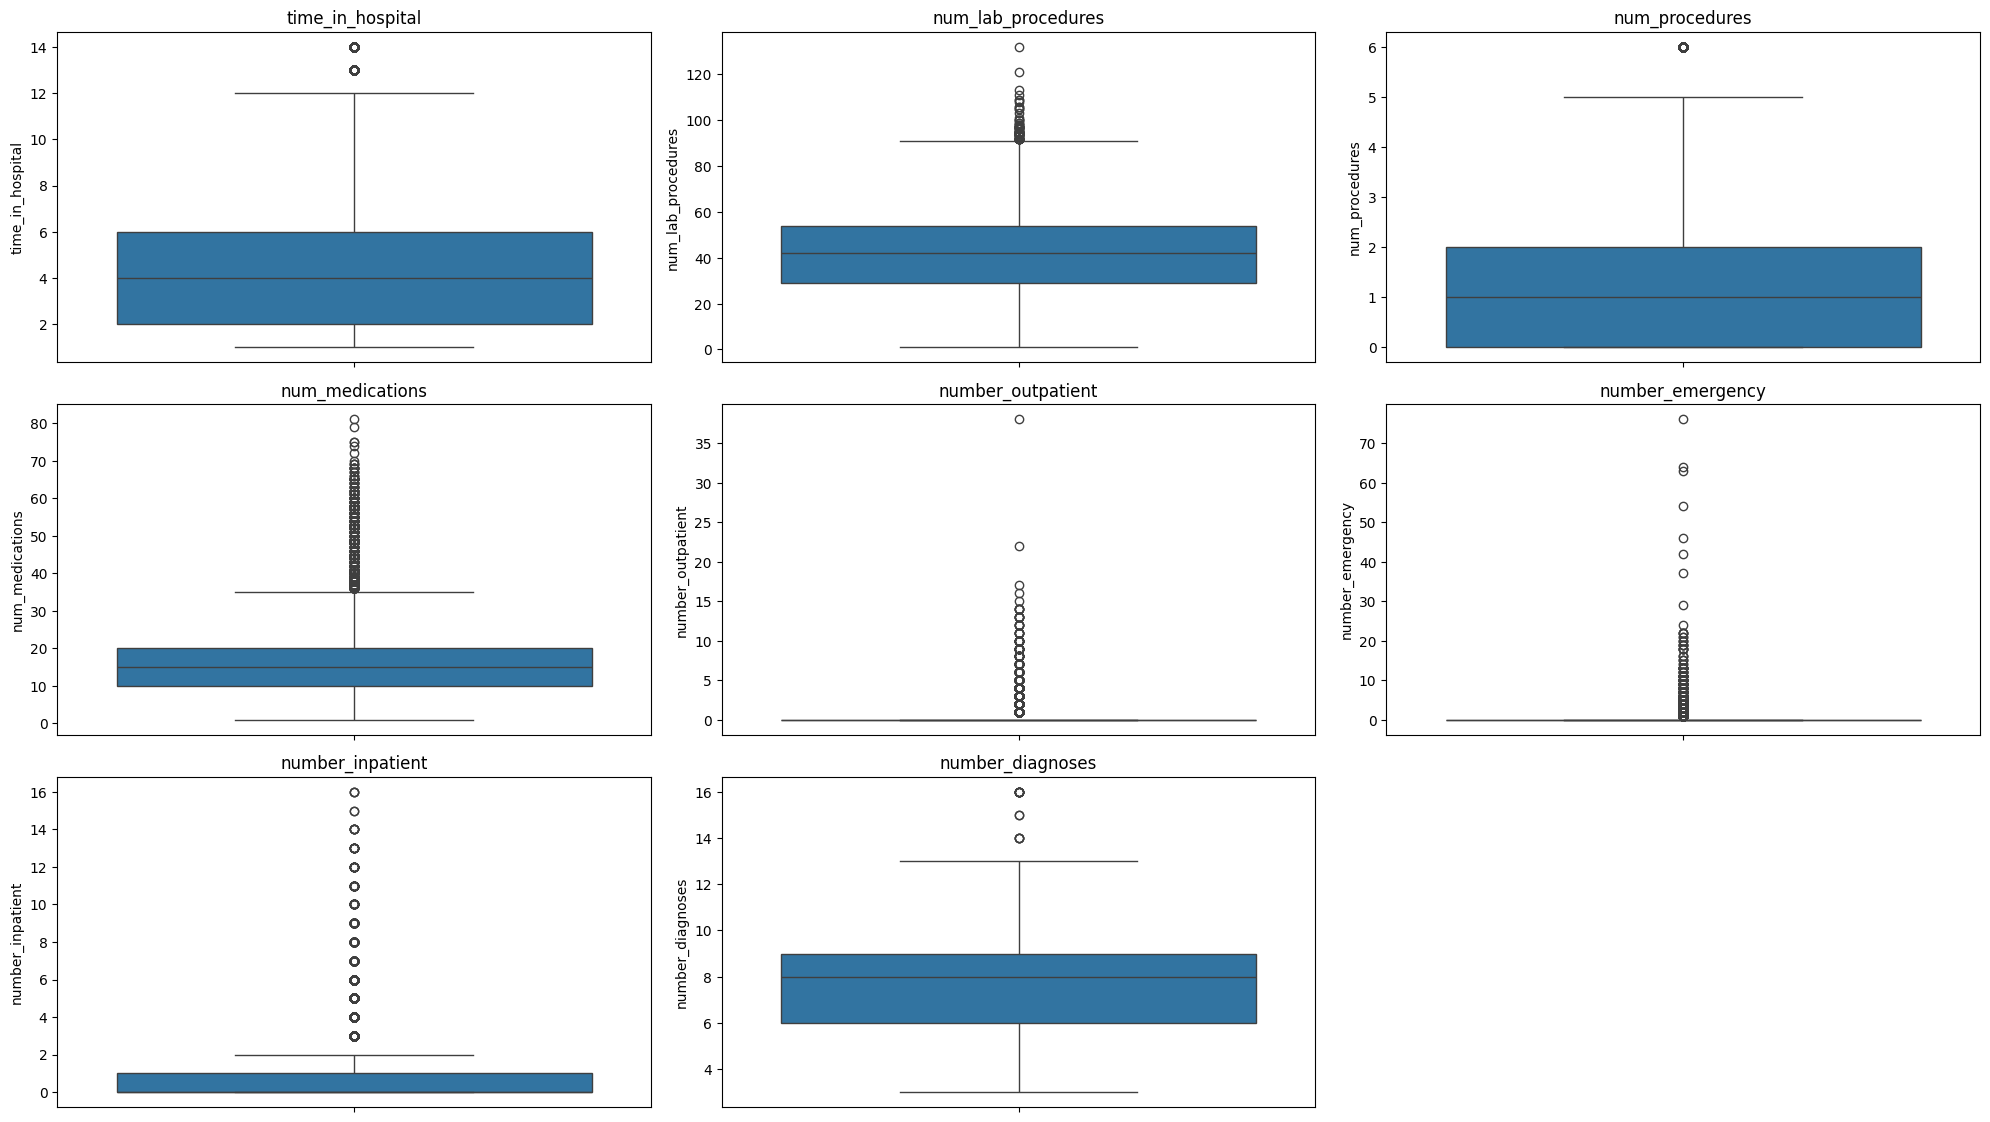

In [428]:
features_boxplot = ['time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses']

# Plotting the boxplots for each feature separately
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_boxplot, start=1):
    plt.subplot(4, 3, i)  # Adjust the grid size according to the number of features
    sns.boxplot(y=data[feature])
    plt.title(feature)

plt.tight_layout()  # Adjust the layout to not overlap the plots
plt.show()

In [429]:
data['admission_type_id']=data['admission_type_id'].apply(lambda x : 5 if x in (6,8) else x)
data['admission_type_id']=data['admission_type_id'].apply(lambda x : 1 if x == 4 else 2 if x==7 else x )

In [430]:
#Discharged Home: 1, 6, 8
data['discharge_disposition_id']=data['discharge_disposition_id'].apply(lambda x : 1 if x in (6,8) else x)

#Uncategorized/Unknown: 18, 25, 26, 12
data['discharge_disposition_id']=data['discharge_disposition_id'].apply(lambda x : 18 if x in (25,26,12) else x)

#Expired:11, 19, 20, 21
data['discharge_disposition_id']=data['discharge_disposition_id'].apply(lambda x : 11 if x in (19,20,21) else x)

#Hospice:13, 14
data['discharge_disposition_id']=data['discharge_disposition_id'].apply(lambda x : 13 if x ==14 else x)

# Discharged/Transferred to Hospital: 2, 9, 10, 23, 27, 28, 29
data['discharge_disposition_id']=data['discharge_disposition_id'].apply(lambda x : 2 if x in ( 9, 10, 23, 27, 28, 29) else x)

#Discharged/Transferred to Care Facility: 3, 4, 5, 15, 24
data['discharge_disposition_id']=data['discharge_disposition_id'].apply(lambda x : 3 if x in ( 4, 5, 15, 24) else x)

#Discharged to Outpatient Services:16, 17
data['discharge_disposition_id']=data['discharge_disposition_id'].apply(lambda x : 16 if x ==17 else x)

In [431]:
data['admission_source_id']= data['admission_source_id'].apply(lambda x : 9 if x in (15, 17, 20, 21) else x)

# Physician/Clinic Referral:1, 2, 3
data['admission_source_id']= data['admission_source_id'].apply(lambda x : 1 if x in (2,3) else x)

#Transfer from Hospital: 4, 10, 22
data['admission_source_id']= data['admission_source_id'].apply(lambda x : 4 if x in (10,22) else x)


#Transfer from Facility:5, 6, 18, 19, 25, 26
data['admission_source_id']= data['admission_source_id'].apply(lambda x : 5 if x in (6, 18, 19, 25, 26) else x)

#Delivery:11, 12, 13, 14
data['admission_source_id']= data['admission_source_id'].apply(lambda x : 11 if x in (12, 13, 14) else x)

In [432]:
diag1_list=[]
diag2_list=[]
diag3_list=[]

In [433]:
def diag_cluster(col, diag_list):
    for x in data[col]:
        # If the value in the 'col' column contains 'V' or 'E', it is assigned a cluster value of 18.
        if 'V' in x or 'E' in x: 
            diag_list.append(18)
            continue
        # The following conditions assign cluster values based on specific ranges of float values.
        elif 1 <= float(x) <= 139:
            diag_list.append(1)
        elif 140 <= float(x) <= 239:
            diag_list.append(2)
        elif 240 <= float(x) <= 279:
            diag_list.append(3)
        elif 280 <= float(x) <= 289:
            diag_list.append(4)
        elif 290 <= float(x) <= 319:
            diag_list.append(5)
        elif 320 <= float(x) <= 389:
            diag_list.append(6)
        elif 390 <= float(x) <= 459:
            diag_list.append(7)
        elif 460 <= float(x) <= 519:
            diag_list.append(8)
        elif 520 <= float(x) <= 579:
            diag_list.append(9)
        elif 580 <= float(x) <= 629:
            diag_list.append(10)
        elif 630 <= float(x) <= 679:
            diag_list.append(11)
        elif 680 <= float(x) <= 709:
            diag_list.append(12)
        elif 710 <= float(x) <= 739:
            diag_list.append(13)
        elif 740 <= float(x) <= 759:
            diag_list.append(14)
        elif 760 <= float(x) <= 779:
            diag_list.append(15)
        elif 780 <= float(x) <= 799:
            diag_list.append(16)
        elif 800 <= float(x) <= 999:
            diag_list.append(17)

In [434]:
diag_cluster('diag_1',diag1_list)
diag_cluster('diag_2',diag2_list)
diag_cluster('diag_3',diag3_list)

In [435]:
data.shape

(26755, 33)

In [436]:
data['change']=data['change'].apply(lambda x: 'Yes' if x=='Ch' else x)

In [437]:
def replace_age_ranges(feature):
  age_ranges = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)','[60-70)', '[70-80)', '[80-90)', '[90-100)']
  values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  
  # The function iterates through the age_ranges and replaces each occurrence in the 'feature' with the corresponding numerical value.
  for i, age_range in enumerate(age_ranges):
    feature = feature.replace(age_range, values[i])

  return feature
data['age']=replace_age_ranges(data['age'])

In [438]:
medicines = ['metformin',   'glipizide', 'glyburide',  'pioglitazone', 'rosiglitazone',  'insulin']

for col in medicines:
    data[col] = data[col].apply(lambda x: 0 if x == 'No' else 1)

In [439]:
data['gender']=data['change'].apply(lambda x: 0 if x=='Female' else 1)

In [440]:
data['change']=data['change'].apply(lambda x : 0 if x=='No' else 1)
data['diabetesMed']=data['diabetesMed'].apply(lambda x : 0 if x=='No' else 1)

In [441]:
data = data.drop('patient_nbr', axis=1)

In [442]:
data = data.copy()

# List of features to apply Z-score method
z_score_features = ['num_lab_procedures']  # Assuming normal distribution

# List of features to apply IQR method
iqr_features = ['num_medications','time_in_hospital', 'num_procedures', 'number_outpatient','number_diagnoses', 'number_emergency', 'number_inpatient']

# Apply Z-score method for assumed normal distribution features
for feature in z_score_features:
    z_scores = np.abs(stats.zscore(data[feature]))
    filtered_entries = (z_scores < 3)  # Filtering out data points that are more than 3 standard deviations away
    data = data[filtered_entries]

# Apply IQR method for skewed distribution features
for feature in iqr_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    filtered_entries = ((data[feature] >= (Q1 - 2.5 * IQR)) & 
                        (data[feature] <= (Q3 + 2.5 * IQR)))
    data = data[filtered_entries]

# Calculate the final size of the dataset after outlier handling
df_cleaned1 = len(data) / len(data) * 100

df_cleaned1

100.0

In [443]:
data = data.copy()

# Features to be normalized
features_normalize = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                      'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features using .loc for proper setting
data.loc[:, features_normalize] = scaler.fit_transform(data[features_normalize])

# Now data should be modified without affecting the original and without warning
print(data[features_normalize].head())

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
20446          0.461538            0.575758        0.333333         0.341463   
20737          0.153846            0.585859        0.500000         0.243902   
20824          0.230769            0.555556        0.166667         0.195122   
21083          0.692308            0.676768        0.166667         0.414634   
23879          0.846154            0.767677        0.833333         0.439024   

       number_outpatient  number_emergency  number_inpatient  number_diagnoses  
20446                0.0               0.0               0.0          0.461538  
20737                0.0               0.0               0.0          0.230769  
20824                0.0               0.0               0.0          0.230769  
21083                0.0               0.0               0.0          0.230769  
23879                0.0               0.0               0.0          0.153846  


In [444]:
data.shape

(19272, 32)

In [445]:
data.to_csv("cleaned_copy.csv", index=False)